# Secret-key or symmetric cryptography Exercise || I.BA_MOVK_MM, Semesterweek 03
*Please write down to solution of the exercises in a consise but comprehensible way. Numerical results
should be accurate to 4 digits.*

## 1. DES S-box S$_{3}$

The input to the DES S-box S3 is 110111. What’s the output? Use Wikipedia, google, a book or some other source to ﬁnd the table for S3.

The first and last bit (here 11) refering to the row index 3 and the middle four bits (here 1011) refering to the column index 11. The output is 0010.

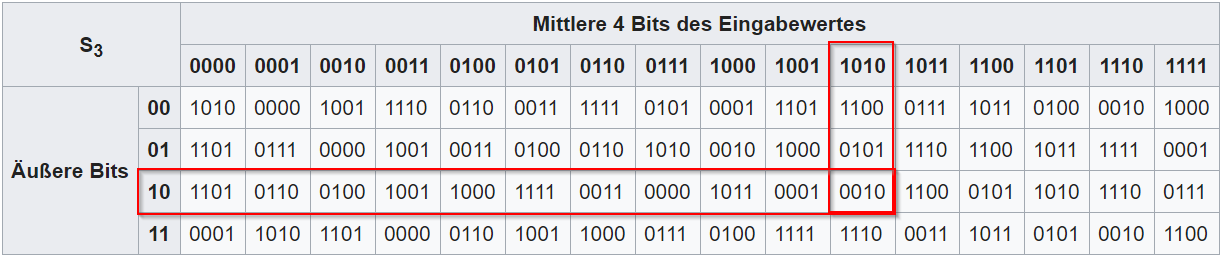
https://de.wikipedia.org/wiki/Data_Encryption_Standard



## 2. 3DES

What is the effective key size of 3DES and why is it not 168 bits?

The effective key length reduces to 112 bit from 168 due to the meet-in-the-middle attack.

## 3. Differences between AES and Rijndeal

What are the differences between the AES candidate Rijndeal and AES with respect to block size, key size and number of rounds?

|					| AES   						| Rijndal   			|
|:-------------------|:-------------------------------|:-----------------------|
|block size			|	128 Bits					|128, 192, 256 bits		|
|key size			| flexible 128, 192 and 256 bits|128, 192, 256 bits		|
|number of rounds	| 10, 12 or 14 rounds			|10, 12, 14 rounds depending on key length|

Note: AES is a substitution-permutation network (SPN).

## 4. AES S-box

If we input the byte 11011101 into the AES S-box, what’s the output? Use the table in slides!

1101 = 13 and therefore the output is 4b

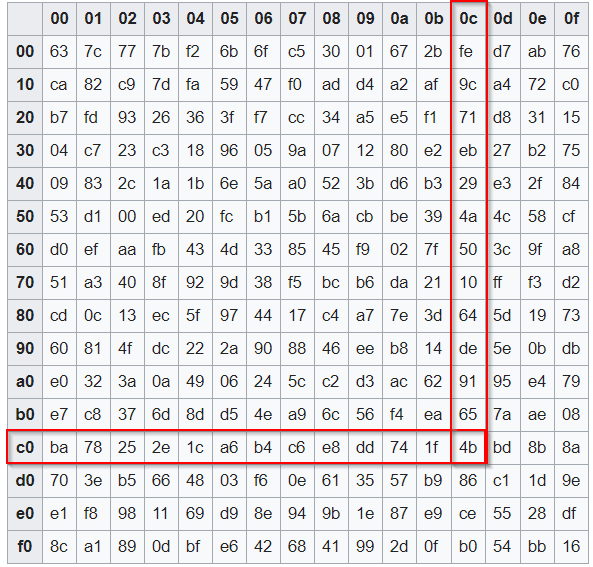
https://en.wikipedia.org/wiki/Rijndael_S-box




## 5. Other Block ciphers

Compare DES, 3DES and AES with other block ciphers like IDEA, Blowﬁsh, Twoﬁsch, RC5, RC6, Serpent and three more of Your choice. Make a table that shows key size, effective key size, block size, number of rounds, relative velocity of a hard- or software implementation.

## 6. Modes of operation

You should be able to produce sketches of the 5 modes of operation and You should be able to write down the 
equations, relating, IVs (if any), plaintext block, key, ciphertext block, encryption and decryption, XOR. 
You should also understand the inﬂuence of a one-bit error in the ciphertext block.

## 7. RC4

Use python in Jupyter Notebook to programm RC4. Do some research on RC4 and ﬁnd out, 
why it should not be used any more! 
Siehe auch Webbrowser: Endgültig Schluss mit RC4 und Der Lange Abschied von RC4.


## 8. Trivium

Use python in Jupyter Notebook to programm Trivium. This is not an easy task: do it in groups of two! 
Use 0x00000000000000000000000000000000 for the key, IV, and plaintext for initial testing. 
The expected ciphertext for this should be 0xFBE0BF265859051B517A2E4E239FC97F. In the algorithm on slide “Trivium — Initialization”, the + represents XOR (which in python is “^”), · represents logical AND (which in python is “&”). The key-stream is

z$_{i}$ =t$_{1}$+t$_{2}$+t$_{3}$

and the ith byte of the ciphertext c$_{i}$ of the plaintext m$_{i}$ is 

c$_{i}$ = z$_{i}$ ⊕ m$_{i}$ 

The following site https://asecuritysite.com/encryption/trivium might be of some help!


## 9. OTP

Make your own example with one-time pad. Why is it perfectly secure? Make sure, the key is truly random not used more than once and kept secret from adversaries.